In [3]:
from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

sc.logging.print_header()

/home/chingyalin/miniconda3/envs/spatial_env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/chingyalin/miniconda3/envs/spatial_env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/chingyalin/miniconda3/envs/spatial_env/lib/python3.10/site-packages/session_info2/__init__.py:124: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  and (v := getattr(pkg, "__version__", None))
/tmp/ipykernel_809030/1459409824.py:11: RuntimeWarning: Fail

zipp	3.21.0
leidenalg	0.10.2
tblib	3.0.0
xarray	2024.11.0
xarray-spatial	0.4.0
imagecodecs	2025.3.30
jaraco.context	5.3.0
asttokens	3.0.0
toolz	1.0.0
msgpack	1.1.0
pyarrow	19.0.1
dask-image	2024.5.3
xarray-schema	0.0.3
numcodecs	0.13.1
cycler	0.12.1
tornado	6.4.2
imageio	2.37.0
texttable	1.7.0
networkx	3.4.2
validators	0.34.0
pure_eval	0.2.3
pytz	2025.2
pyproj	3.7.1
pyct	0.5.0
PyYAML	6.0.2
multipledispatch	1.0.0 (0.6.0)
debugpy	1.8.11
decorator	5.2.1
MarkupSafe	3.0.2
llvmlite	0.44.0
patsy	1.0.1
executing	2.1.0
lazy_loader	0.4
statsmodels	0.14.4
wcwidth	0.2.13
jaraco.collections	5.1.0
tifffile	2025.3.30
docrep	0.3.2
prompt_toolkit	3.0.50
jaraco.functools	4.0.1
shapely	2.0.7
parso	0.8.4
charset-normalizer	3.4.1
geopandas	1.0.1
kiwisolver	1.4.8
h5py	3.13.0
pillow	11.1.0
natsort	8.4.0
importlib_metadata	8.6.1
igraph	0.11.8
jaraco.text	3.12.1
asciitree	0.3.3
requests	2.32.3
certifi	2025.1.31 (2025.01.31)
ome-zarr	0.10.3
joblib	1.4.2
psutil	7.0.0 (5.9.1)
zarr	2.18.3
numba	0.61.0
dask	2024.11.2
python-dateutil	2.9.0.post0
stack_data	0.6.3
six	1.17.0
ipython	8.34.0
jedi	0.19.2
pickleshare	0.7.5
setuptools	75.8.0
----	----
Python	3.10.16 (main, Dec 11 2024, 16:24:50) [GCC 11.2.0]
OS	Linux-6.8.0-49-generic-x86_64-with-glibc2.35
CPU	24 logical CPU cores, x86_64
GPU	ID: 0, NVIDIA GeForce RTX 4080, Driver: 535.183.01, Memory: 16376 MiB
Updated	2025-04-02 06:04

In [4]:
## Download data (if needed) -> Use linux
# !mkdir tutorial_data
# !mkdir tutorial_data/nanostring_data
# !wget -P tutorial_data/nanostring_data https://nanostring-public-share.s3.us-west-2.amazonaws.com/SMI-Compressed/Lung5_Rep2/Lung5_Rep2+SMI+Flat+data.tar.gz
# !tar -xzf tutorial_data/nanostring_data/Lung5_Rep2+SMI+Flat+data.tar.gz -C tutorial_data/nanostring_data/

In [5]:
nanostring_dir = Path().resolve() / "tutorial_data" / "nanostring_data"
sample_dir = nanostring_dir / "Lung5_Rep2" / "Lung5_Rep2-Flat_files_and_images"

adata = sq.read.nanostring(
    path=sample_dir,
    counts_file="Lung5_Rep2_exprMat_file.csv",
    meta_file="Lung5_Rep2_metadata_file.csv",
    fov_file="Lung5_Rep2_fov_positions_file.csv",
)

In [6]:
adata.var["NegPrb"] = adata.var_names.str.startswith("NegPrb")
sc.pp.calculate_qc_metrics(adata, qc_vars=["NegPrb"], inplace=True)
import pandas as pd

pd.set_option("display.max_columns", None)

/home/chingyalin/miniconda3/envs/spatial_env/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [7]:
adata.obs["total_counts_NegPrb"].sum() / adata.obs["total_counts"].sum() * 100

np.float64(0.3722155201830987)

/tmp/ipykernel_809030/3192088675.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby("fov").sum()["total_counts"],


<Axes: title={'center': 'Transcripts per FOV'}, xlabel='total_counts', ylabel='Count'>

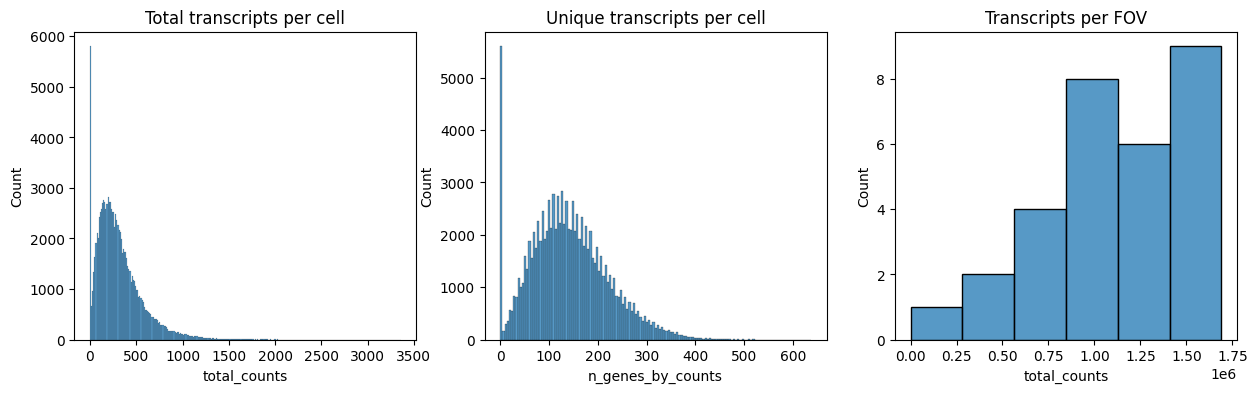

In [8]:
## Plot the distribution of total transcripts per cell, unique transcripts per cell and transcripts per FOV.
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)

axs[2].set_title("Transcripts per FOV")
sns.histplot(
    adata.obs.groupby("fov").sum()["total_counts"],
    kde=False,
    ax=axs[2],
)

<Axes: title={'center': 'CD3'}, xlabel='Mean.CD3', ylabel='Count'>

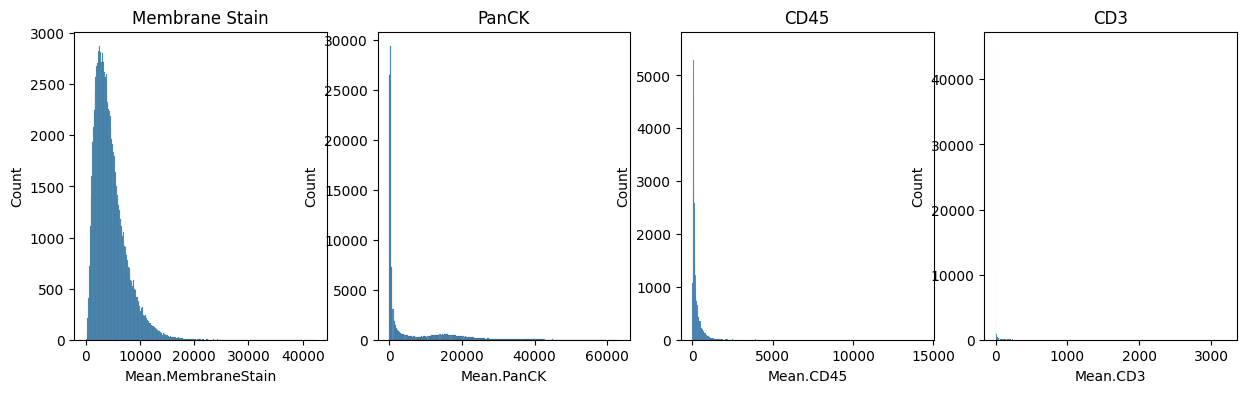

In [9]:
## immunofluorescence data
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Membrane Stain")
sns.histplot(
    adata.obs["Mean.MembraneStain"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("PanCK")
sns.histplot(
    adata.obs["Mean.PanCK"],
    kde=False,
    ax=axs[1],
)

axs[2].set_title("CD45")
sns.histplot(
    adata.obs["Mean.CD45"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("CD3")
sns.histplot(
    adata.obs["Mean.CD3"],
    kde=False,
    ax=axs[3],
)

In [10]:
## Filter the cells and genes
sc.pp.filter_cells(adata, min_counts=100)
sc.pp.filter_genes(adata, min_cells=400)

In [11]:
## Data preprocessing
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
#sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
#adata = adata[:, adata.var["highly_variable"]]
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/home/chingyalin/miniconda3/envs/spatial_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_809030/2670429575.py:10: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


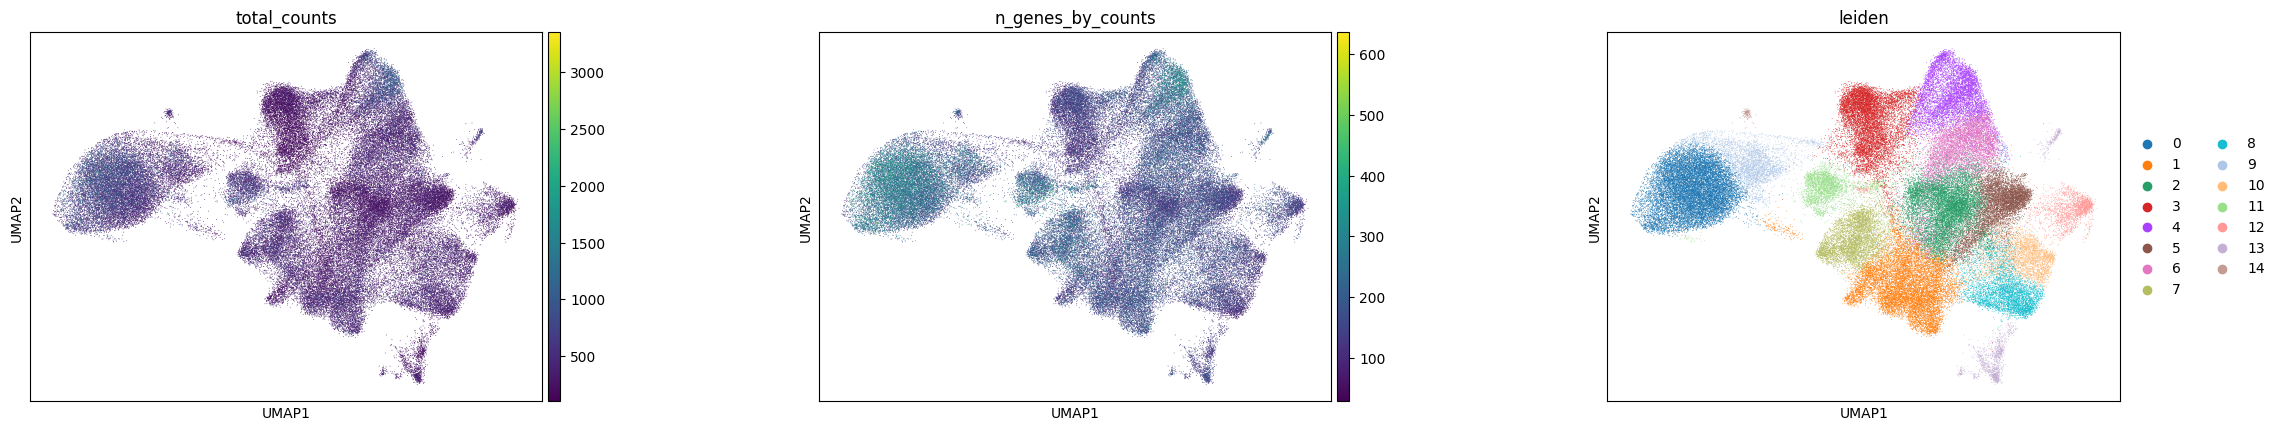

In [12]:
## Umap visualization
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden"
    ],
    wspace=0.4,
)

In [13]:
# 用這個可以看還想要怎麼對Umap上色
adata.obs.keys()

Index(['fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px',
       'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain',
       'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3',
       'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb',
       'n_counts', 'leiden'],
      dtype='object')

In [14]:
'''
sq.pl.spatial_segment(
    adata,
    color="Max.PanCK",
    library_key="fov",
    seg_cell_id="cell_ID",
)'
'''

'\nsq.pl.spatial_segment(\n    adata,\n    color="Max.PanCK",\n    library_key="fov",\n    seg_cell_id="cell_ID",\n)\'\n'

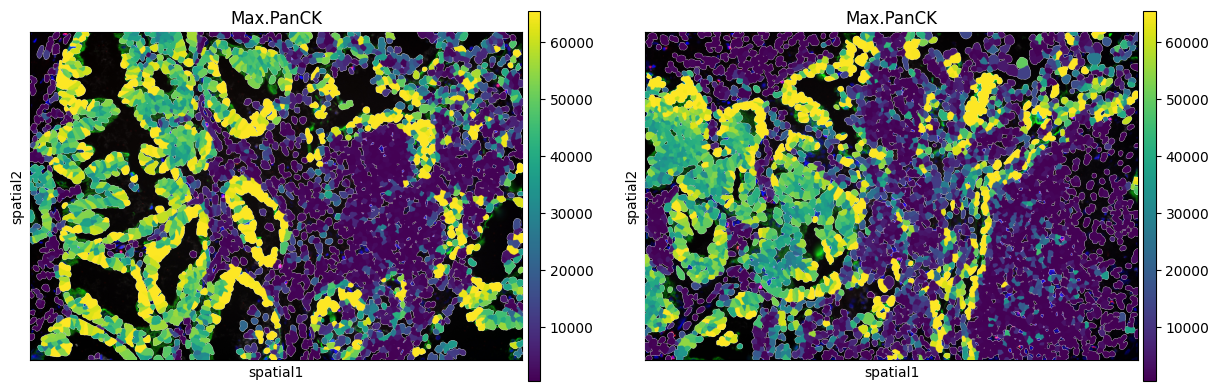

In [15]:
sq.pl.spatial_segment(
    adata,
    color="Max.PanCK",
    library_key="fov",
    library_id=["12", "16"],
    seg_cell_id="cell_ID",
)

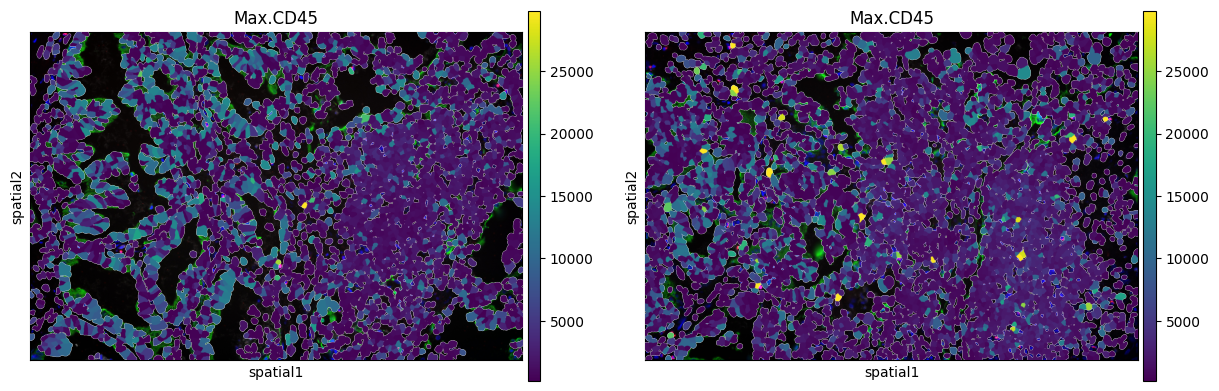

In [16]:
sq.pl.spatial_segment(
    adata,
    color="Max.CD45",
    library_key="fov",
    library_id=["12", "16"],
    seg_cell_id="cell_ID",
)

/home/chingyalin/miniconda3/envs/spatial_env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:724: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  val_im[val_im == erosion(val_im, square(seg_erosionpx))] = 0


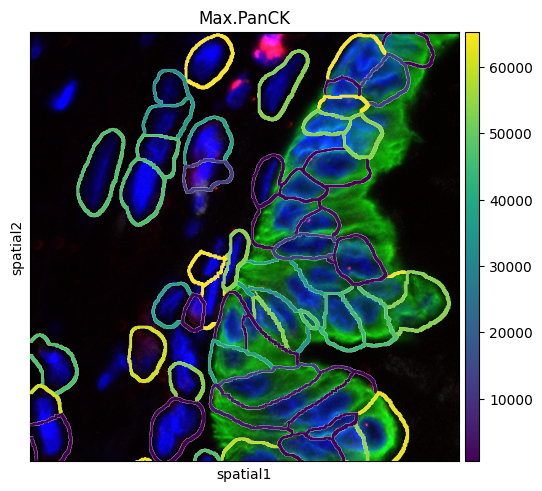

In [17]:
sq.pl.spatial_segment(
    adata,
    color="Max.PanCK",
    library_key="fov",
    library_id="12",
    seg_cell_id="cell_ID",
    seg_contourpx=10,
    crop_coord=[(0, 0, 700, 700)],
)

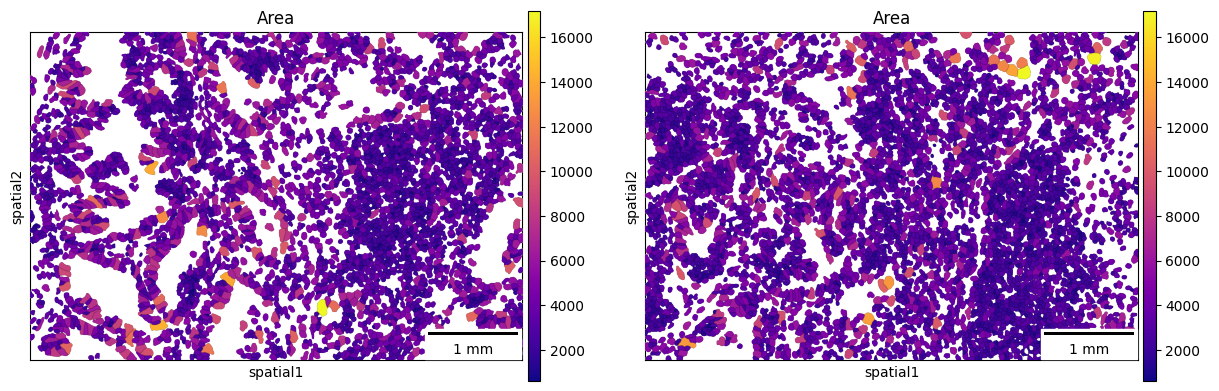

In [18]:
# 給予比例尺圖例
sq.pl.spatial_segment(
    adata,
    color="Area",
    library_key="fov",
    library_id=["12", "16"],
    seg_cell_id="cell_ID",
    seg_outline=True,
    cmap="plasma",
    img=False,
    scalebar_dx=1.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
)

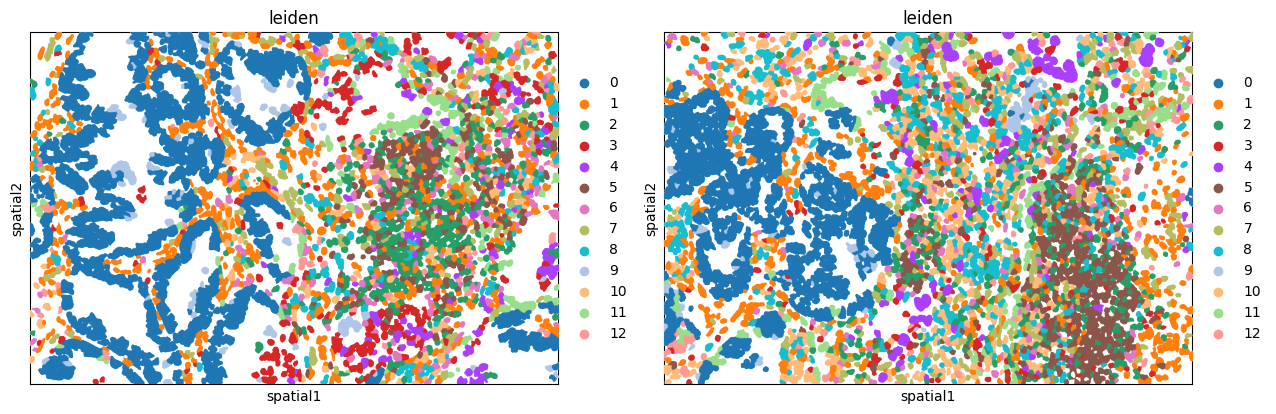

In [19]:
## 使用 lendian cluster 的方式畫圖
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sq.pl.spatial_segment(
    adata,
    shape="hex",
    color="leiden",
    library_key="fov",
    library_id="12",
    seg_cell_id="cell_ID",
    img=False,
    size=60,
    ax=ax[0],
)

sq.pl.spatial_segment(
    adata,
    color="leiden",
    seg_cell_id="cell_ID",
    library_key="fov",
    library_id="16",
    img=False,
    size=60,
    ax=ax[1],
)

/home/chingyalin/miniconda3/envs/spatial_env/lib/python3.10/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/chingyalin/miniconda3/envs/spatial_env/lib/python3.10/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]


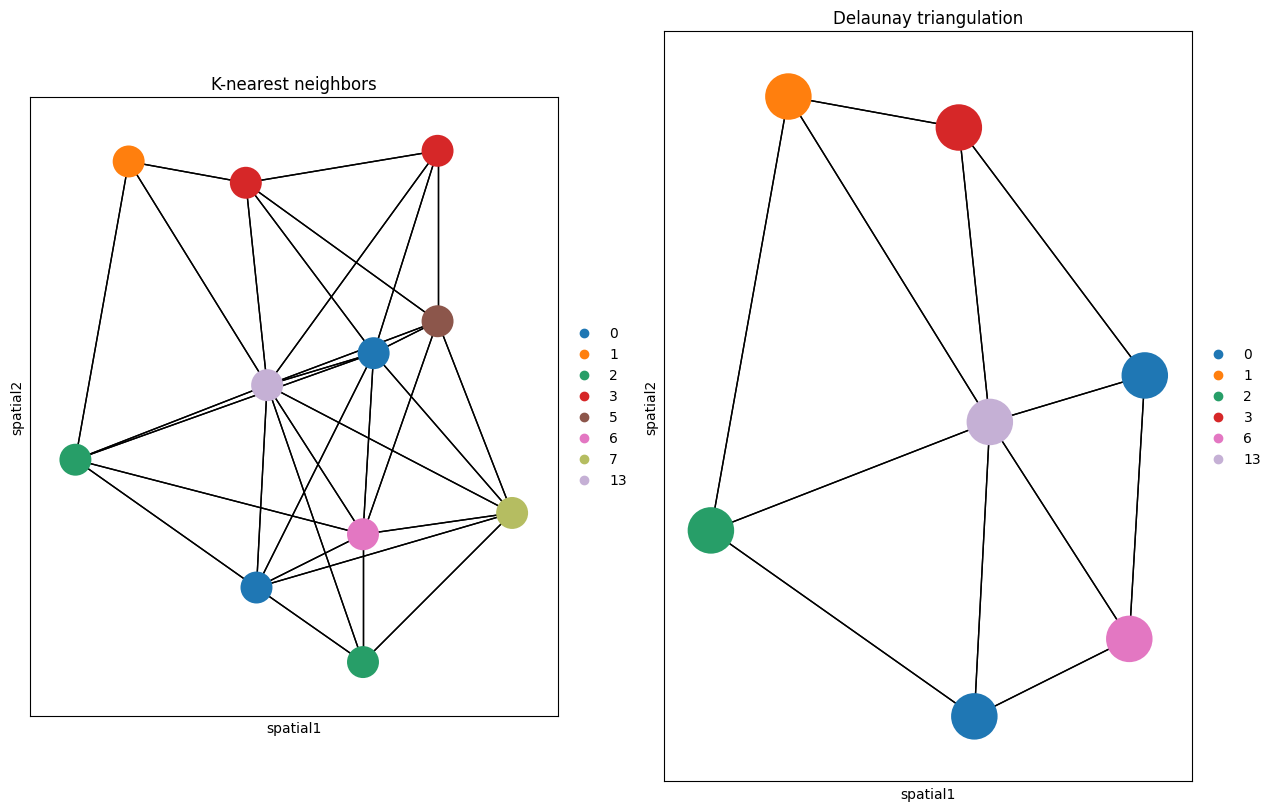

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
sq.gr.spatial_neighbors(
    adata,
    n_neighs=10,
    coord_type="generic",
)
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(
    adata[idx, :],
    library_id="16",
    color="leiden",
    connectivity_key="spatial_connectivities",
    size=3,
    edges_width=1,
    edges_color="black",
    img=False,
    title="K-nearest neighbors",
    ax=ax[0],
)

sq.gr.spatial_neighbors(
    adata,
    n_neighs=10,
    coord_type="generic",
    delaunay=True,
)
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(
    adata[idx, :],
    library_id="16",
    color="leiden",
    connectivity_key="spatial_connectivities",
    size=3,
    edges_width=1,
    edges_color="black",
    img=False,
    title="Delaunay triangulation",
    ax=ax[1],
)

In [21]:
adata.obsp["spatial_connectivities"]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 534344 stored elements and shape (89246, 89246)>

In [22]:
adata.obsp["spatial_distances"]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 534344 stored elements and shape (89246, 89246)>

/home/chingyalin/miniconda3/envs/spatial_env/lib/python3.10/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]


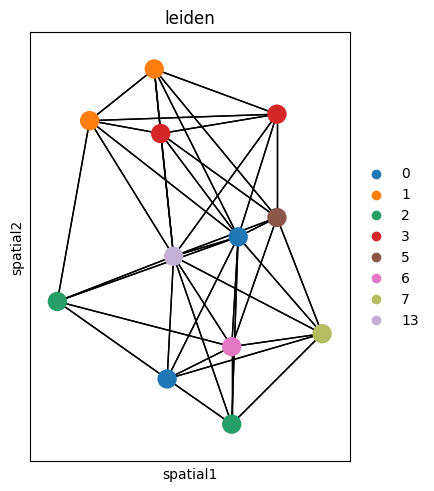

In [23]:
sq.gr.spatial_neighbors(
    adata,
    radius=30,
    coord_type="generic",
)

_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(
    adata[idx, :],
    library_id="16",
    color="leiden",
    connectivity_key="spatial_connectivities",
    size=3,
    edges_width=1,
    edges_color="black",
    img=False,
)

In [24]:
adata.obsp["spatial_connectivities"]
adata.obsp["spatial_distances"]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1101570 stored elements and shape (89246, 89246)>

In [25]:
### 聚中心程度的計算
adata_spatial_neighbor = sq.gr.spatial_neighbors(
    adata, coord_type="generic", delaunay=True
)

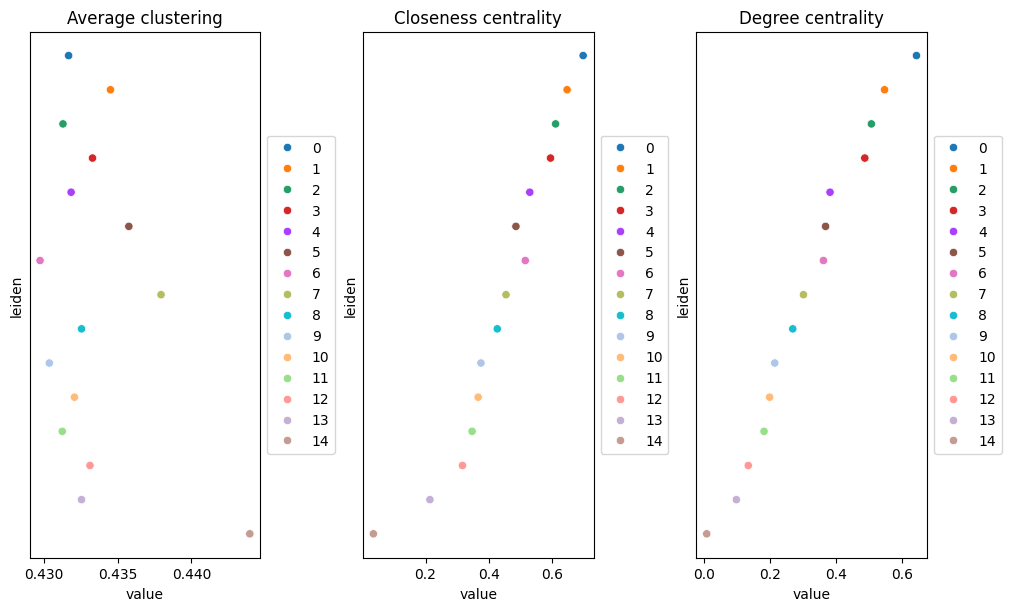

In [26]:
sq.gr.centrality_scores(adata, cluster_key="leiden")
sq.pl.centrality_scores(adata, cluster_key="leiden", figsize=(10, 6))

100%|██████████| 1/1 [00:02<00:00,  2.65s/]


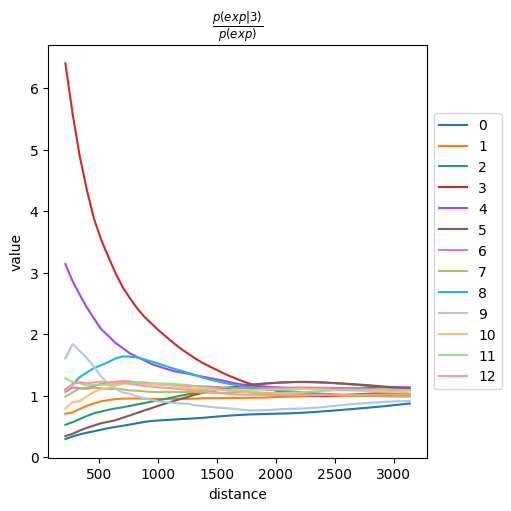

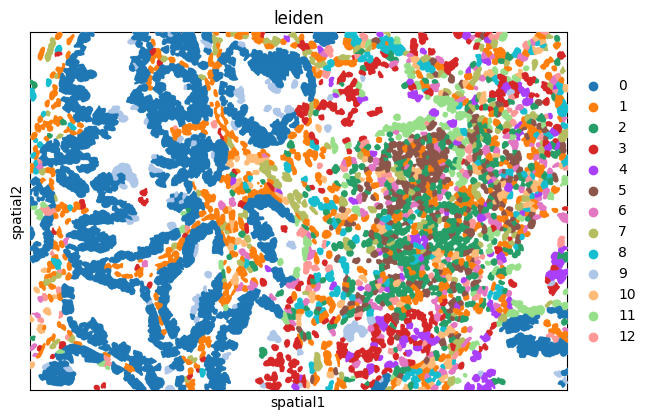

In [27]:
## Co-occurence probability
adata_subset = adata[adata.obs.fov == "12"].copy()
sq.gr.co_occurrence(
    adata_subset,
    cluster_key="leiden",
)
sq.pl.co_occurrence(
    adata_subset,
    cluster_key="leiden",
    clusters="3",
)


sq.pl.spatial_segment(
    adata_subset,
    shape="hex",
    color="leiden",
    library_id="12",
    library_key="fov",
    seg_cell_id="cell_ID",
    img=False,
    size=60,
)

## Neighbors enrichment analysis

In [28]:
sq.gr.nhood_enrichment(adata, cluster_key="leiden")

100%|██████████| 1000/1000 [00:02<00:00, 353.52/s]


In [29]:
sq.gr.nhood_enrichment(adata_subset, cluster_key="leiden")

100%|██████████| 1000/1000 [00:00<00:00, 6352.03/s]


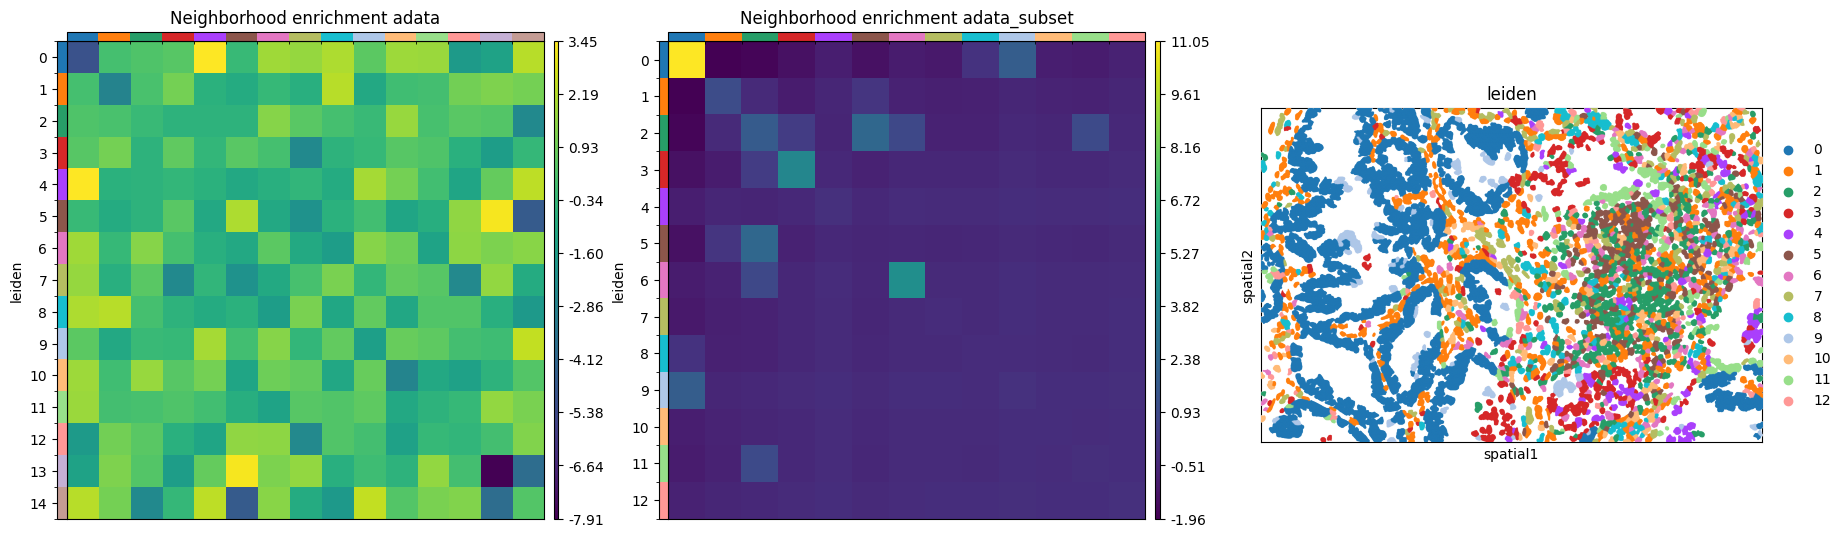

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(22, 22))
sq.pl.nhood_enrichment(
    adata,
    cluster_key="leiden",
    figsize=(3, 3),
    ax=ax[0],
    title="Neighborhood enrichment adata",
)
sq.pl.nhood_enrichment(
    adata_subset,
    cluster_key="leiden",
    figsize=(3, 3),
    ax=ax[1],
    title="Neighborhood enrichment adata_subset",
)
sq.pl.spatial_segment(
    adata_subset,
    shape="hex",
    color="leiden",
    library_id="12",
    library_key="fov",
    seg_cell_id="cell_ID",
    img=False,
    size=60,
    ax=ax[2],
)

## Compute Ripley’s statistics

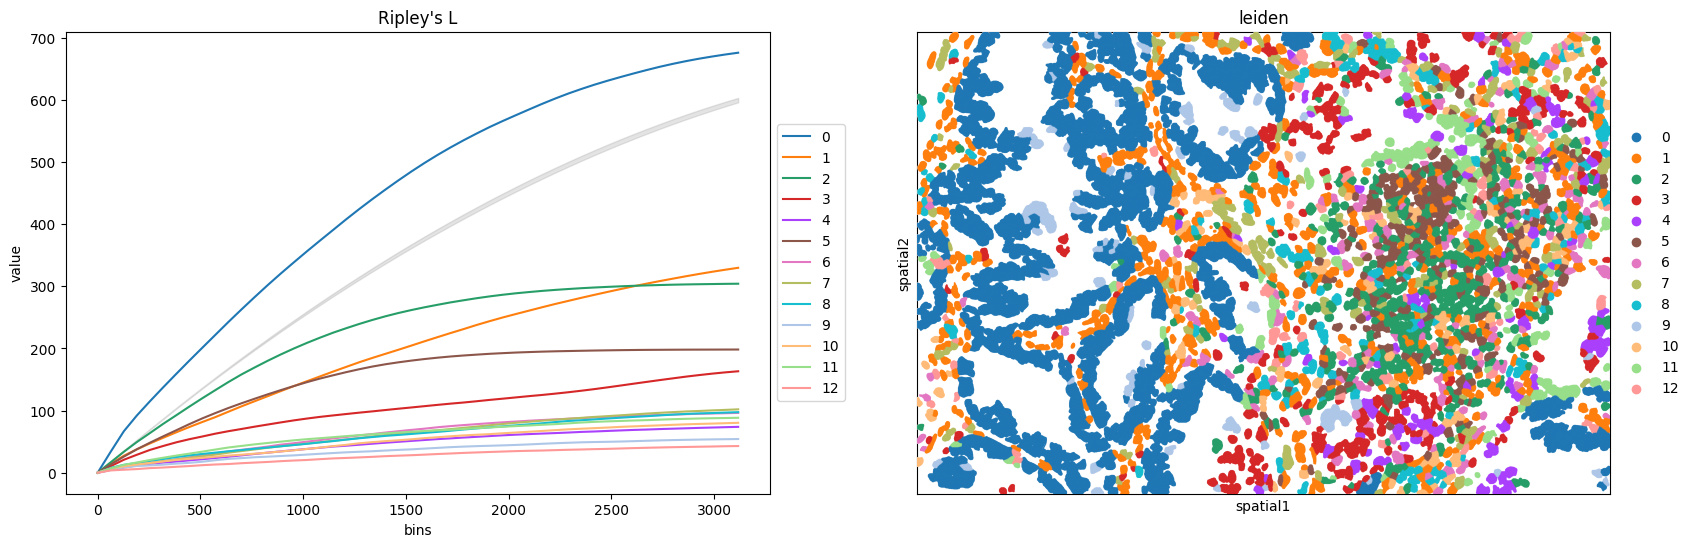

In [32]:
mode = "L"
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sq.gr.ripley(adata_subset, cluster_key="leiden", mode=mode)
sq.pl.ripley(
    adata_subset,
    cluster_key="leiden",
    mode=mode,
    ax=ax[0],
)

sq.pl.spatial_segment(
    adata_subset,
    shape="hex",
    color="leiden",
    library_id="12",
    library_key="fov",
    seg_cell_id="cell_ID",
    img=False,
    size=60,
    ax=ax[1],
)

## Compute Moran’s I score

In [36]:
sq.gr.spatial_neighbors(adata_subset, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(
    adata_subset,
    mode="moran",
    n_perms=100,
    n_jobs=1,
)
adata_subset.uns["moranI"].head(10)

100%|██████████| 100/100 [00:01<00:00, 64.77/s]


I  pval_norm  var_norm  pval_z_sim  pval_sim   var_sim  \
KRT19    0.725040        0.0  0.000095         0.0  0.009901  0.000198   
OLFM4    0.723510        0.0  0.000095         0.0  0.009901  0.000159   
CEACAM6  0.669597        0.0  0.000095         0.0  0.009901  0.000196   
S100A6   0.637774        0.0  0.000095         0.0  0.009901  0.000197   
KRT17    0.620170        0.0  0.000095         0.0  0.009901  0.000185   
TM4SF1   0.616362        0.0  0.000095         0.0  0.009901  0.000206   
MMP7     0.513190        0.0  0.000095         0.0  0.009901  0.000151   
EPCAM    0.474510        0.0  0.000095         0.0  0.009901  0.000144   
ANXA2    0.448879        0.0  0.000095         0.0  0.009901  0.000110   
KRT8     0.445318        0.0  0.000095         0.0  0.009901  0.000116   

         pval_norm_fdr_bh  pval_z_sim_fdr_bh  pval_sim_fdr_bh  
KRT19                 0.0                0.0         0.019842  
OLFM4                 0.0                0.0         0.019842  
CEACAM6               0.0                0.0         0.019842  
S100A6                0.0                0.0         0.019842  
KRT17                 0.0                0.0         0.019842  
TM4SF1                0.0                0.0         0.019842  
MMP7                  0.0                0.0         0.019842  
EPCAM                 0.0                0.0         0.019842  
ANXA2                 0.0                0.0         0.019842  
KRT8                  0.0                0.0         0.019842

In [40]:
# 把 moranI 表格轉成 dataframe（如果還沒轉）
moran_df = adata_subset.uns["moranI"]

# 選取特定基因
genes_of_interest = ["KRT19", "ANXA2", "COL1A1"]
moran_df.loc[genes_of_interest]

I  pval_norm  var_norm  pval_z_sim  pval_sim   var_sim  \
KRT19   0.725040        0.0  0.000095         0.0  0.009901  0.000198   
ANXA2   0.448879        0.0  0.000095         0.0  0.009901  0.000110   
COL1A1  0.383767        0.0  0.000095         0.0  0.009901  0.000104   

        pval_norm_fdr_bh  pval_z_sim_fdr_bh  pval_sim_fdr_bh  
KRT19                0.0                0.0         0.019842  
ANXA2                0.0                0.0         0.019842  
COL1A1               0.0                0.0         0.019842

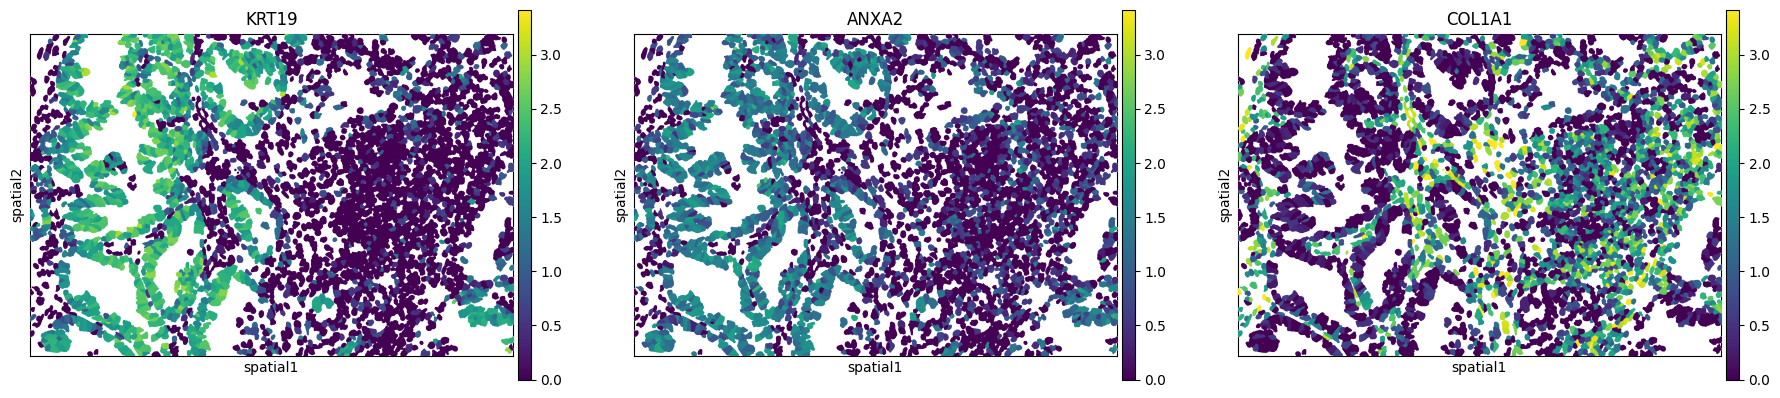

In [37]:
sq.pl.spatial_segment(
    adata_subset,
    library_id="12",
    seg_cell_id="cell_ID",
    library_key="fov",
    color=["KRT19", "ANXA2", "COL1A1"],
    size=60,
    img=False,
)